TypeError: 'str' object is not callable

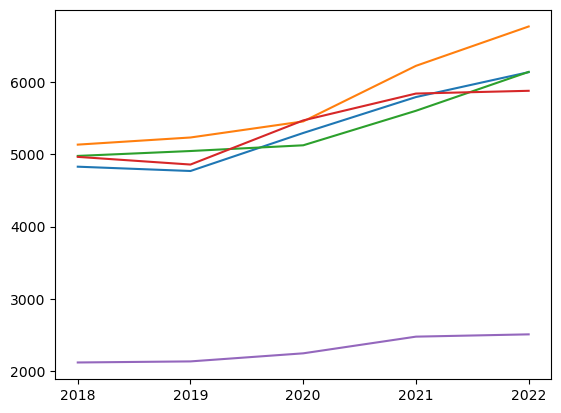

In [21]:
from bs4 import BeautifulSoup 
import pandas as pd 
import numpy as np
import requests
import matplotlib.pyplot as plt


url = 'https://en.wikipedia.org/wiki/List_of_countries_by_total_health_expenditure_per_capita'
csv_file = 'Health_Expenditures.csv'

def extract():
    df = pd.DataFrame(columns=["Country", '2018', '2019', '2020', '2021', '2022'])
    
    html_page = requests.get(url).text
    data = BeautifulSoup(html_page, 'html.parser')
    tables = data.find_all('tbody')
    rows = tables[0].find_all('tr')
    
    for row in rows:
        col = row.find_all('td')
        if len(col) != 0:
            data_dict = {"Country": col[0].a.contents[0],
                         "2018": col[1].get_text(strip=True).replace(',', ''),
                        "2019": col[2].get_text(strip=True).replace(',', ''),
                        "2020": col[3].get_text(strip=True).replace(',', ''),
                        "2021": col[4].get_text(strip=True).replace(',', ''),
                        "2022": col[5].get_text(strip=True).replace(',', '')}
            df1 = pd.DataFrame(data_dict, index=[0])
            df = pd.concat([df, df1], ignore_index=True)
                
    return df

def transform(df): 
    for year in ['2018', '2019', '2020', '2021', '2022']:
        df[year] = pd.to_numeric(df[year], errors='coerce')
        df[year] = round((df[year] * 0.93),2)
        
    return df 

def load_to_csv(df, csv_file):
    df.to_csv(csv_file, index=False)
    
df = extract()
df = transform(df)
load_to_csv(df,csv_file)

def visualise(df): 
    df = df.head(5)  
    x = ['2018', '2019', '2020', '2021', '2022']
    
    for country in df['Country']:
        y = df[df['Country'] == country][x].values.flatten()
        plt.plot(x, y, label=country)
    
    plt.xlabel('Years')
    plt.ylabel('Health Expenditures in EUR')
    plt.title('Health Expenditure per Capita Over Years')
    plt.legend()
    plt.show()
    
visualise(df)

def visualise_plot(df):
    data_to_plot = df[['2018']]
    
    fig = plt.figure(figsize=(10, 7))
    
    data_to_plot.boxplot()

    plt.title('Boxplot')
    plt.ylabel('Health Expenditures')
    plt.xlabel('Year')
    plt.show()
    
visualise_plot(df)

